In [100]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, tree
import numpy as np
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [115]:
X, y = datasets.make_classification(n_features = 2, n_informative = 2,
                                    n_classes = 3, n_redundant = 0,
                                    n_clusters_per_class = 1, random_state = int(round(time.time())))

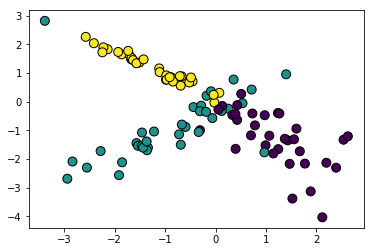

In [117]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=80, edgecolor='k')

In [119]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(X, y,
                                                                                     test_size=0.3,
                                                                                     random_state=1)

In [120]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [121]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.83333333333333337

In [122]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [126]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 60, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 60, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

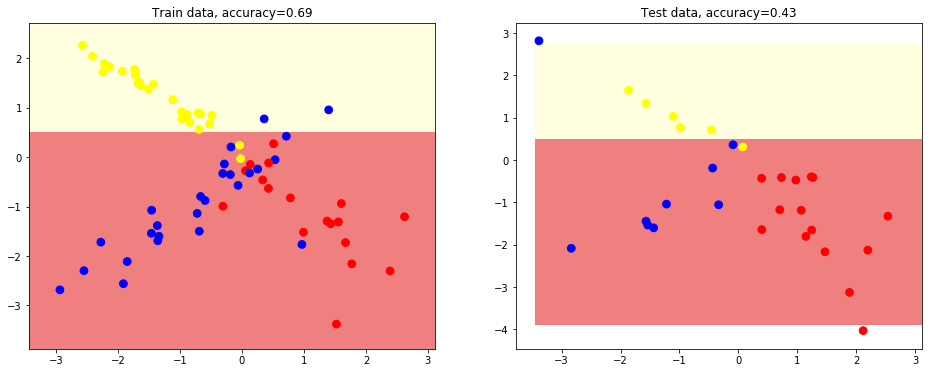

In [128]:
clf = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)
plot_decision_surface(clf, train_data, train_labels, test_data, test_labels)

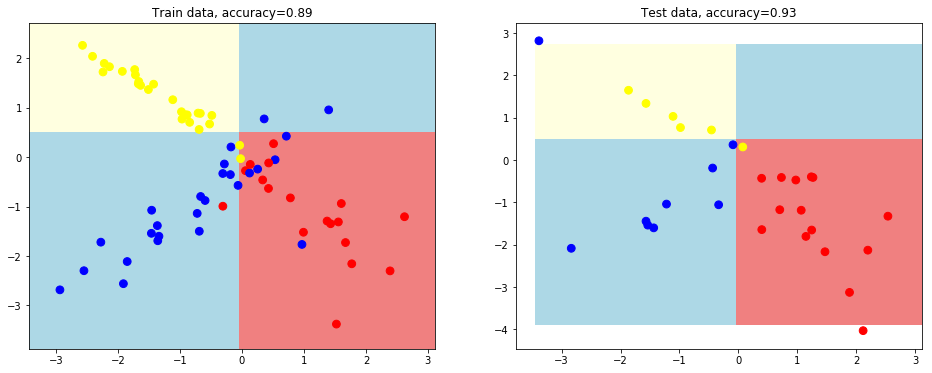

In [130]:
clf = tree.DecisionTreeClassifier(random_state = 1, max_depth = 2)
plot_decision_surface(clf, train_data, train_labels, test_data, test_labels)

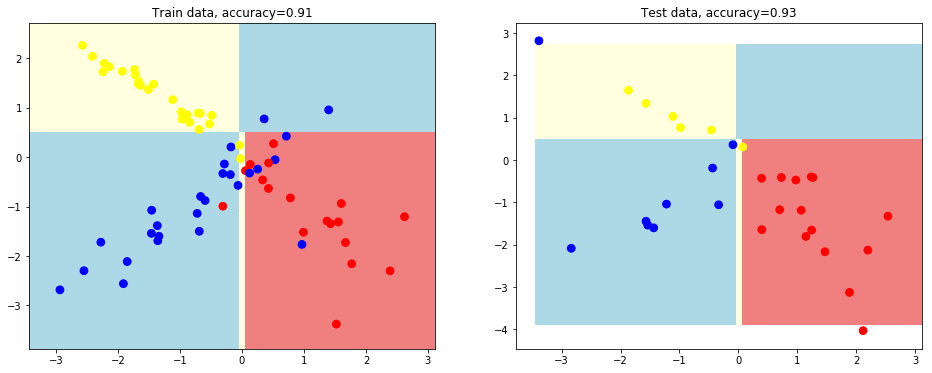

In [133]:
clf = tree.DecisionTreeClassifier(random_state = 1, max_depth = 3)
plot_decision_surface(clf, train_data, train_labels, test_data, test_labels)

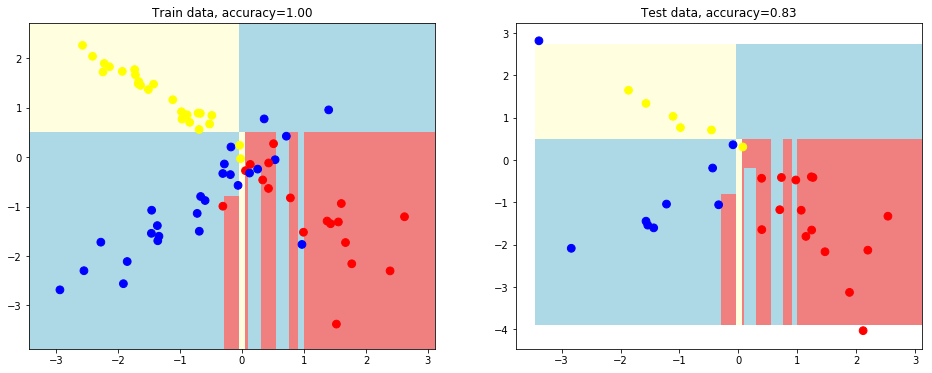

In [132]:
clf = tree.DecisionTreeClassifier(random_state = 1)
plot_decision_surface(clf, train_data, train_labels, test_data, test_labels)